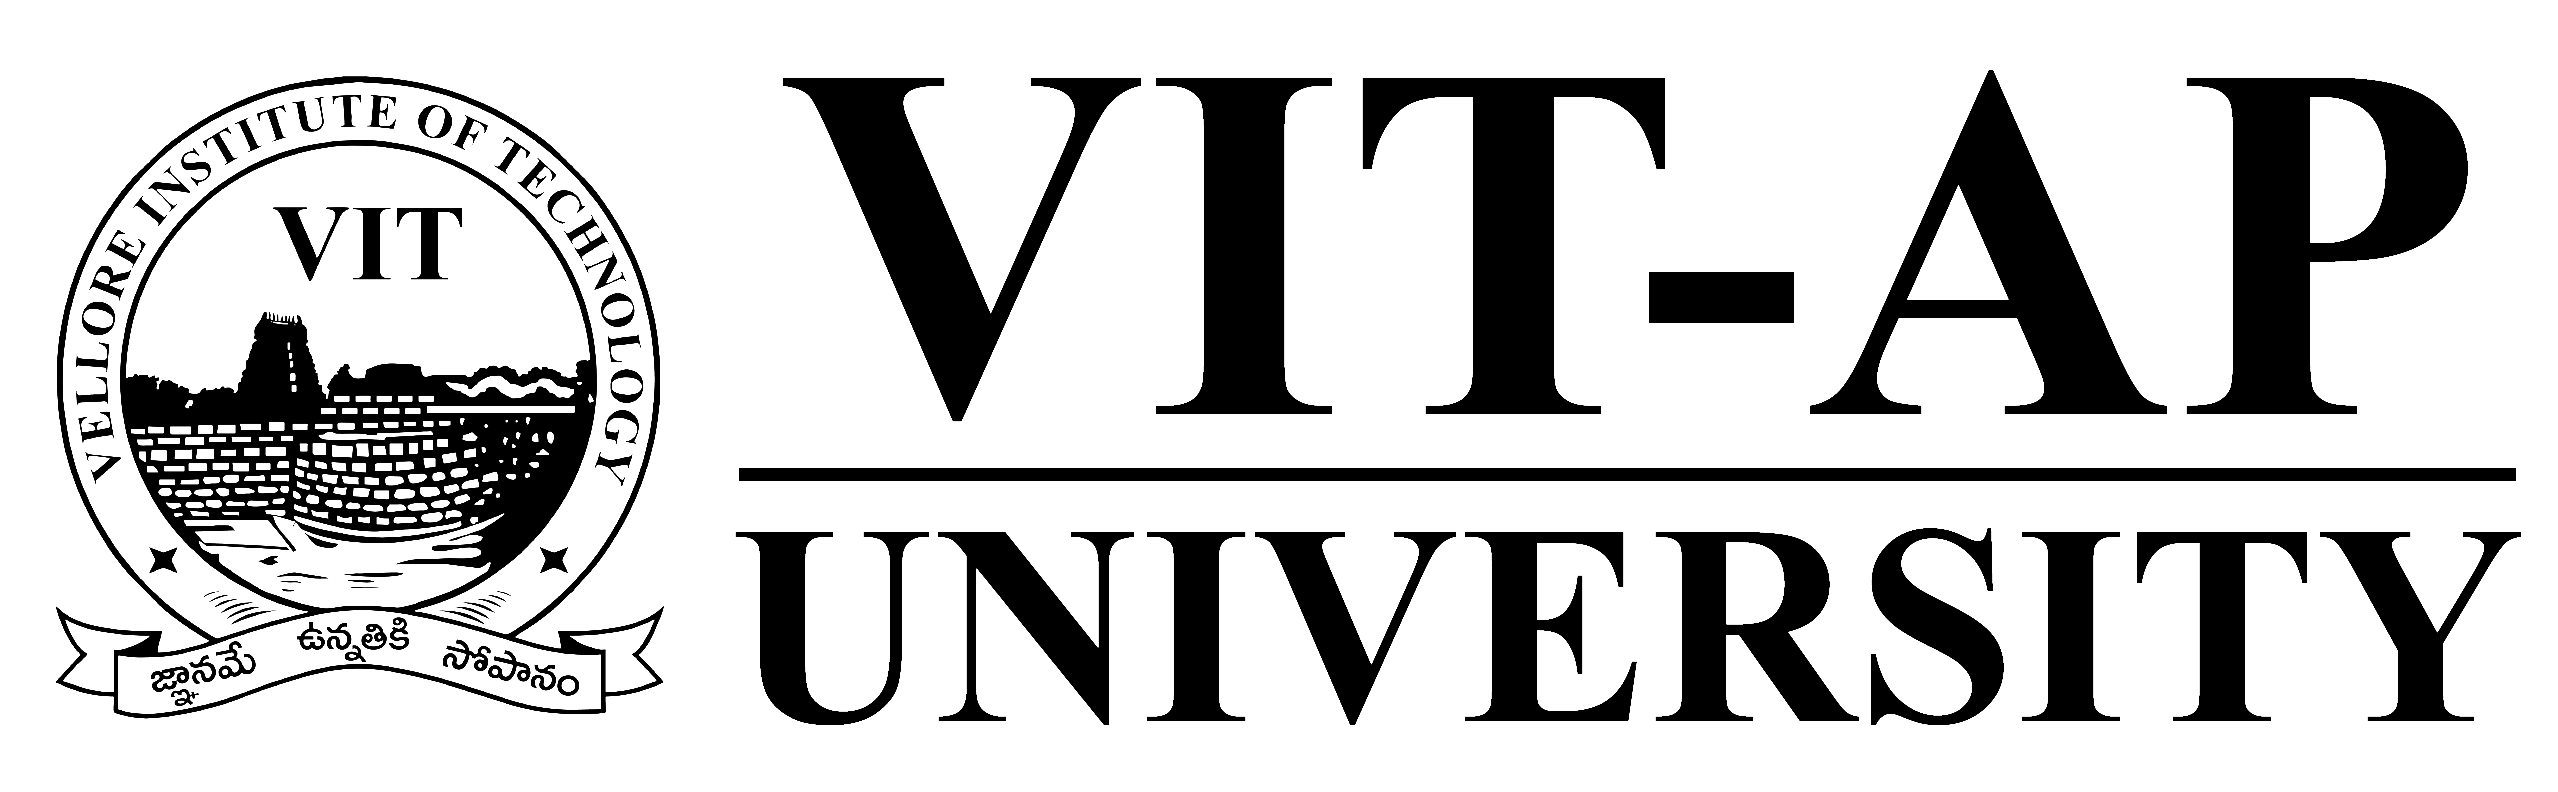

# VIT UNIVERSITY, ANDHRA PRADESH

#    School of CSE  

# CSE3008 - Introduction to Machine Learning (LAB)

# Project - Bill Authentication

Faculty-Dr. B. SRINIVASA RAO



> Name-Neeraj Guntuku


> R.No-18MIS7071


> Slot-L55+L56




# Index



*   Decision Tree Classifier (98)
*   Bayes Classifier (82)
*   Logistic Regression (97)
*   Random Forest For Classification (99)
*   Support Vector Machine (98)
*   List item








In [1]:
!pip install scikit-plot
!pip install stemgraphic
!pip install graphviz
!pip install pydotplus
!pip install statsmodels

     |████████████████████████████████| 71kB 4.6MB/s 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import stemgraphic 
import pydotplus
import statsmodels.api as sm
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [2]:
dataset = pd.read_csv("bill_authentication.csv")

In [3]:
dataset.shape

(1372, 5)

In [4]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
dataset.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [7]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
dataset['Class'].unique()

array([0, 1])

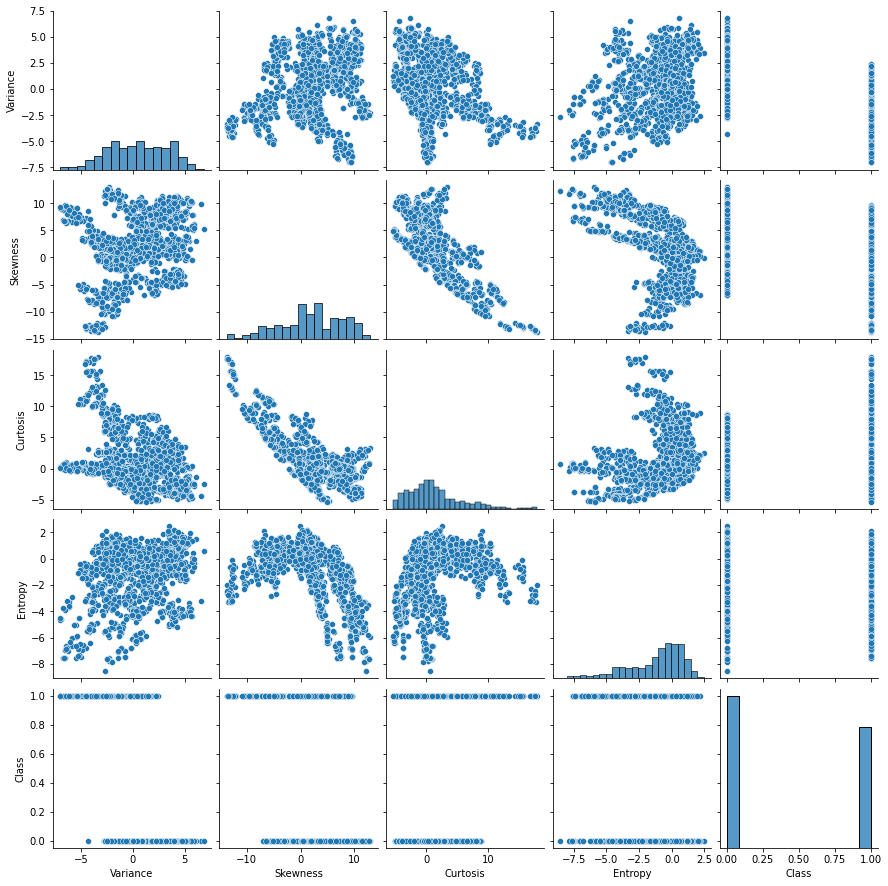

In [9]:
sns.pairplot(dataset)

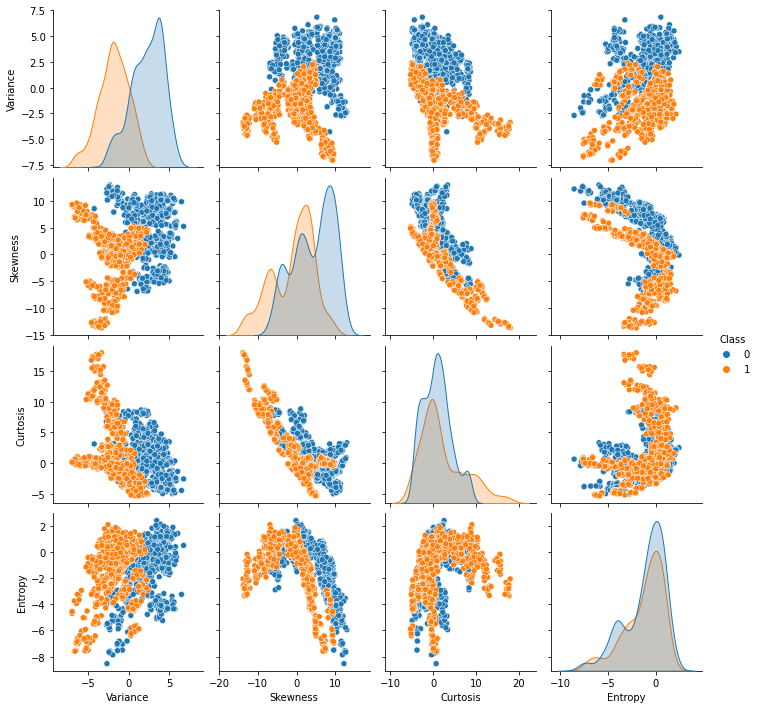

In [10]:
sns.pairplot(dataset,hue='Class')

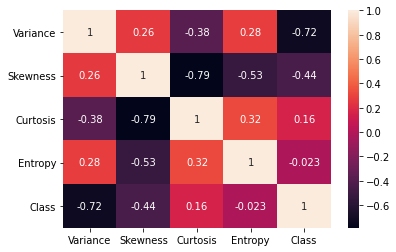

In [11]:
corr = dataset.corr()
sns.heatmap(corr,annot=True)

In [12]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# ---------------------------------------------------------------------------------------------------------------------------------------------

# Decision Tree Classifier

In [14]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
y_pred = tree_classifier.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       150
           1       0.97      0.98      0.97       125

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



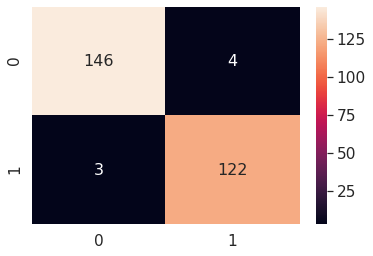

In [17]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()

In [18]:
features = dataset.columns
features = features.drop('Class')
features

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

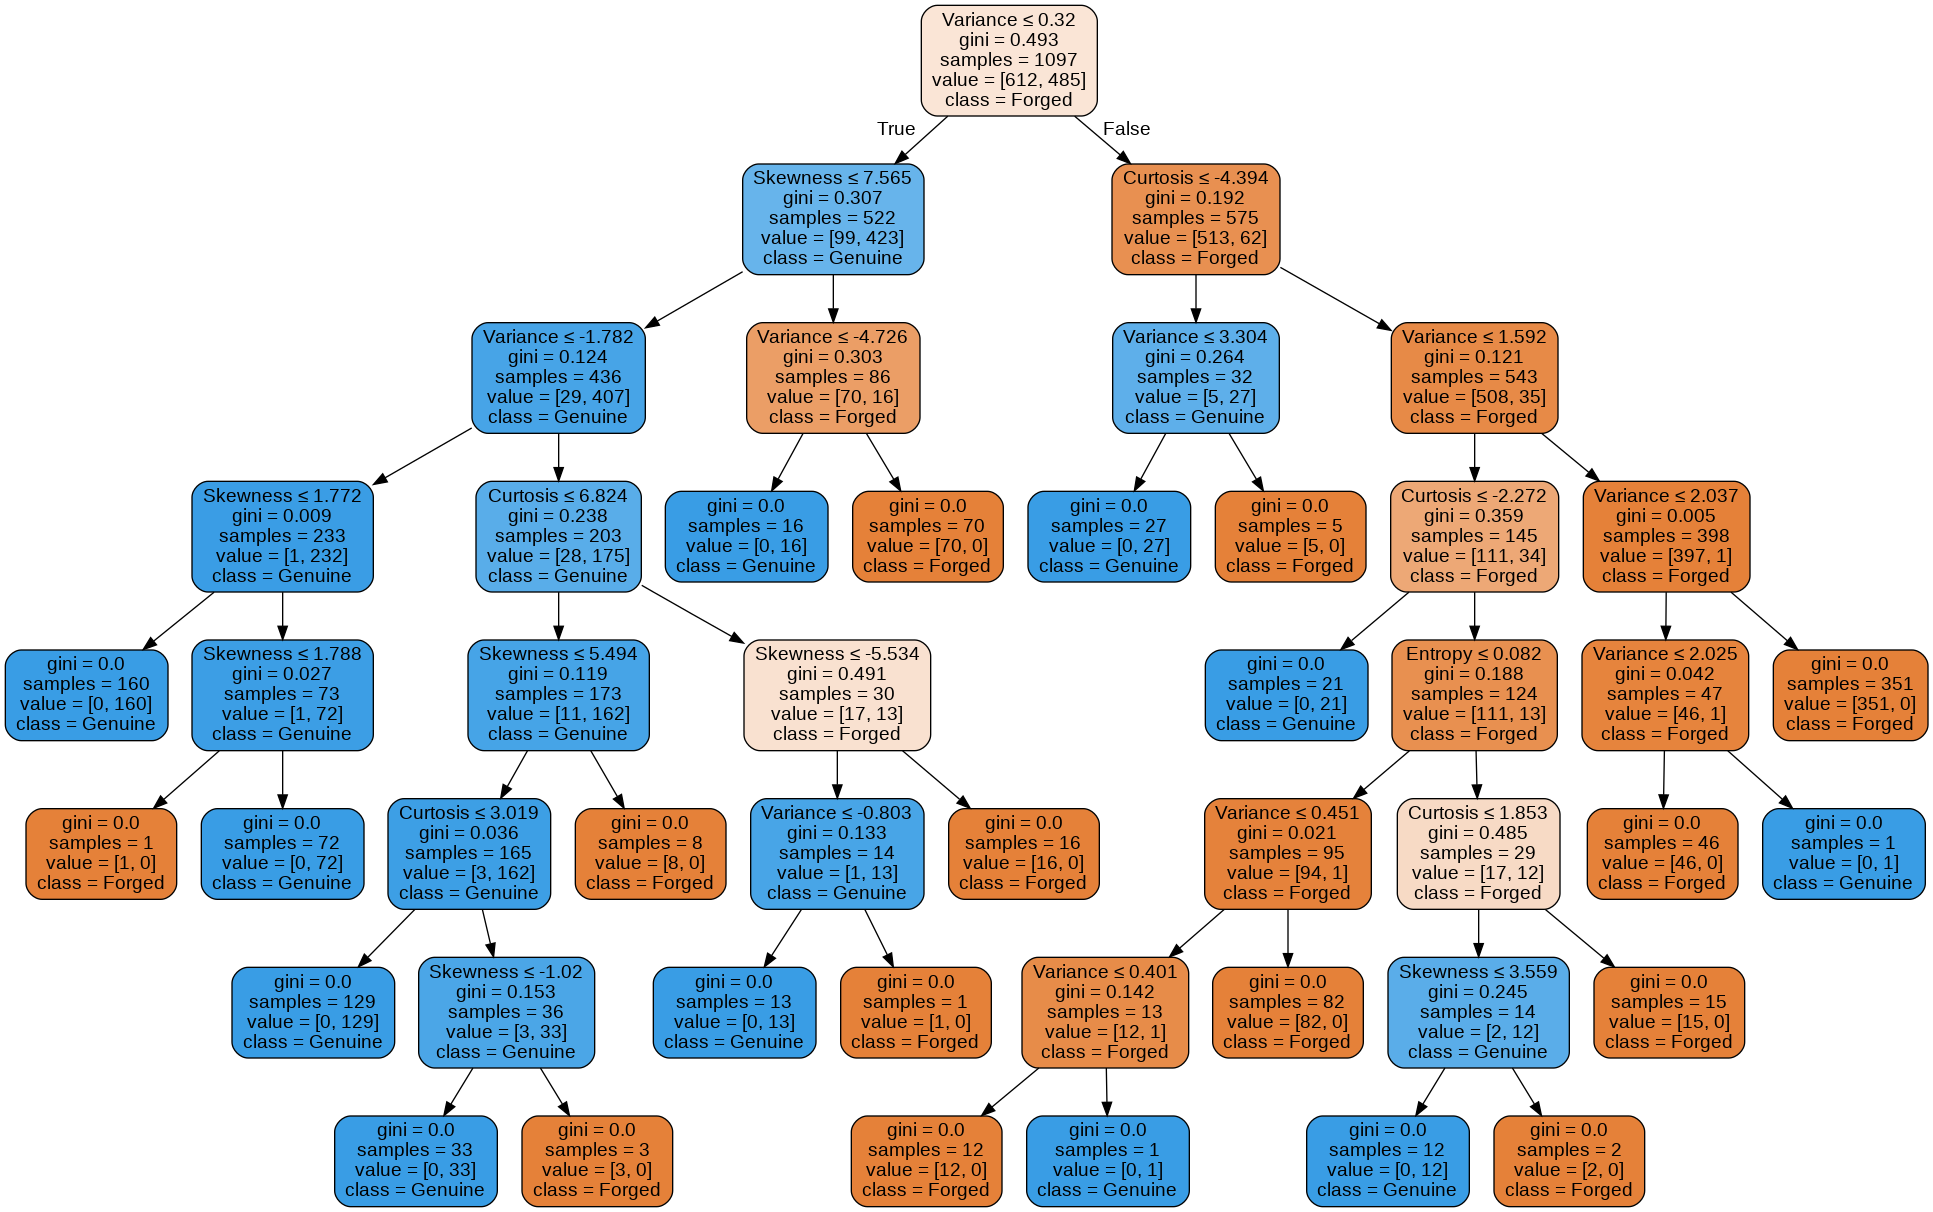

In [19]:
dot_data = StringIO()
export_graphviz(tree_classifier, 
 out_file=dot_data, 
 class_names=['Forged','Genuine'], # the target names.
 feature_names= features , # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# ---------------------------------------------------------------------------------------------------------------------------------------------

# Bayes Classifier

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
y_pred = gnb.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       150
           1       0.89      0.80      0.84       125

    accuracy                           0.87       275
   macro avg       0.87      0.86      0.86       275
weighted avg       0.87      0.87      0.86       275



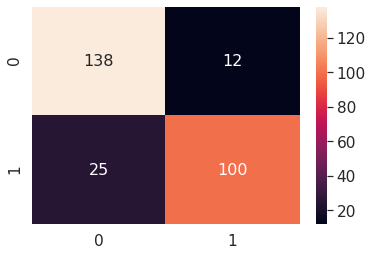

In [24]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()

# ---------------------------------------------------------------------------------------------------------------------------------------------

# Logistic Regression

In [25]:
dataset_log=pd.read_csv("bill_authentication.csv")
X_log=dataset_log.drop('Class',axis=1)
y_log=dataset_log['Class']

In [26]:
from sklearn.model_selection import train_test_split
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(X_log,y_log,test_size=0.20)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='auto')

In [29]:
model.fit(X_train_log,y_train_log)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
model.score(X_test_log,y_test_log)

0.9963636363636363

# ---------------------------------------------------------------------------------------------------------------------------------------------

# Random Forest for Classification

In [31]:
dataset_rand = pd.read_csv("bill_authentication.csv")


In [32]:
# Preparing Data For Training
X_rand = dataset_rand.iloc[:, 0:4].values
y_rand = dataset_rand.iloc[:, 4].values

In [33]:
from sklearn.model_selection import train_test_split

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X_rand, y_rand, test_size=0.2, random_state=0)


In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_rand = sc.fit_transform(X_train_rand)
X_test_rand = sc.transform(X_test_rand)

In [35]:
# Training the Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train_rand, y_train_rand)
y_pred_rand = classifier.predict(X_test_rand)

In [36]:
# Training the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_rand = confusion_matrix(y_test_rand, y_pred_rand)
print("Confusion Matrix:")
print(result_rand)

Confusion Matrix:
[[155   2]
 [  1 117]]


In [37]:
result1_rand = classification_report(y_test_rand, y_pred_rand)
print("Classification Report:",)
print (result1_rand)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



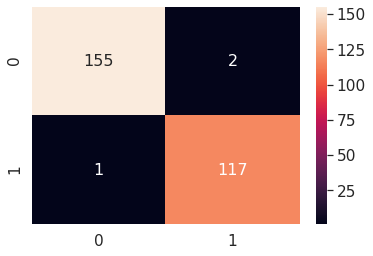

In [38]:
cm_rand = confusion_matrix(y_test_rand, y_pred_rand)
df_cm_rand = pd.DataFrame(cm_rand, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_rand, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()

In [39]:
result2_rand = accuracy_score(y_test_rand,y_pred_rand)
print("Accuracy:",result2_rand)

Accuracy: 0.9890909090909091


# ---------------------------------------------------------------------------------------------------------------------------------------------

#  SVM (support vector machine)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
bankdata = pd.read_csv("bill_authentication.csv")

In [41]:
bankdata.shape

(1372, 5)

In [42]:
X_svm = bankdata.drop('Class', axis=1)
y_svm = bankdata['Class']

In [43]:
from sklearn.model_selection import train_test_split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size = 0.20)


In [44]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_svm, y_train_svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred_svm = svclassifier.predict(X_test_svm)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_svm,y_pred_svm))
print(classification_report(y_test_svm,y_pred_svm))

[[152   1]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



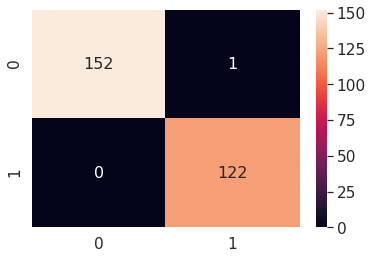

In [47]:
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
df_cm_svm = pd.DataFrame(cm_svm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_svm, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()

In [48]:
result3_svm = accuracy_score(y_test_svm,y_pred_svm)
print("Accuracy:",result3_svm)

Accuracy: 0.9963636363636363


# ---------------------------------------------------------------------------------------------------------------------------------------------

# Final Conclusion
For Decision Tree
```
#               precision    recall  f1-score   support

           0       1.00      0.99      0.99       154
           1       0.98      1.00      0.99       121

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275
```
For Bayes Classifier
```
#              precision    recall  f1-score   support

           0       0.83      0.86      0.84       154
           1       0.82      0.77      0.79       121

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275

```

For Logistic Regression - Score:
```
# 0.9890909090909091
```

For Random Forest
```
# Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275
```

For SVM
```
# [[148   4]
 [  1 122]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       152
           1       0.97      0.99      0.98       123

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275
```


